<a href="https://colab.research.google.com/github/Raoufmamedov/DSPR/blob/main/Mussels_(eda_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA-тест, проверьте данные на нормальность и на наличие корреляции. 

Для этого:

* Объедините два массива в DataFrame. 
* Обоснуйте выбор теста на корреляцию. 
* Сделайте вывод по гипотезе.
* Ответьте на вопрос: Какова разница в среднем размере мидии в зависимости от города-производителя
* Обоснуйте выбор теста. 
* Сделайте вывод по гипотезе.

# Установка библиотек

In [ ]:
import pandas as pd #для работы с таблицами
import numpy as np
from scipy.stats import shapiro, normaltest, ttest_ind, f_oneway, mannwhitneyu
from scipy.stats.mstats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns


# Загрузка данных

In [ ]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]


Для начала сведём выборки в единый датафрейм и найдём средние значения размера моллюска для обеих выборок.

In [ ]:
mussels=pd.DataFrame(data=[petersburg, magadan]).T 
mussels.columns=['Saint-Petersburg', 'Magadan']

In [ ]:
mussels.mean()

Saint-Petersburg    0.103443
Magadan             0.078012
dtype: float64

In [ ]:
round((mussels.mean()[0]/mussels.mean()[1]-1)*100, 1)

32.6

Итак мидии из Санкт-Петербурга крупнее своих Магаданских сородичей на 32.6%, практиически на треть! Если бы у нас была большая выборка, было бы очевидно что питерские мидии значимо крупнее магаданских. Но у нас всего 6 наблюдений для мидий первых и 7 наблюдений для вторых. Следовательно наше преположение о значимости различия может оказаться несостоятельным, и мы должны проверить наше предположение.

Для этого, нам для начала надо определиться с методом, который мы будем использовать для проверки нашего предположения. а выбор метода будет определяться тем являются ли распределения мидий по размерам нормальными или нет. 

Поскольку у нас отсутствует значение для седьмого измерения по Санкт-Петербургу, заменим пропуск модальным значением для этой выборки.

In [ ]:
mussels.fillna(mussels['Saint-Petersburg'].median(), inplace=True)

In [ ]:
mussels.mean()

Saint-Petersburg    0.103212
Magadan             0.078012
dtype: float64

Находим также среднее значение для всего набора данных.

In [ ]:
mussels.to_numpy().flatten().mean()

0.0906125

Построим гистограммы распределений мидий по размеру для каждой выборки и для суммарной выборки.

<AxesSubplot:ylabel='Count'>

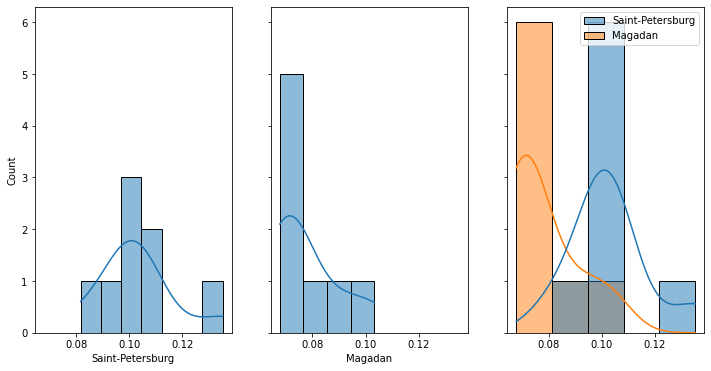

In [ ]:
fig, axes =plt.subplots(nrows=1, ncols=3, figsize=(12, 6), sharey=True, sharex=True)
sns.histplot(mussels['Saint-Petersburg'], ax=axes[0], kde=True)
sns.histplot(mussels['Magadan'], ax=axes[1], kde=True)
sns.histplot(mussels, ax=axes[2], kde=True)

В сравнени с распределением по размерам мидий выращенных в Магадане, характер распределения мидий выращенных в Санкт-Петербурге выглядит визуально ближе к гауссову. Формулируем нулевую гипотезу о нормальности распределения для каждой из выборок (H0), и альтернативную о нарушении нормальности (Ha).

In [ ]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
alpha = 0.05

In [ ]:
mussels

,Saint-Petersburg,Magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1016,0.0689


In [ ]:
def checker(testname, city ,test, df, alpha=0.05): # Фунция тестировавания нормальности
    _, p = test(df)
    print(testname, 'для популяции:',city )
    print('p=%.3f' % p,":",H0 if p > alpha else Ha)

# Проверка данных на нормальность


## Тест Шапиро-Уилка

In [ ]:
checker('Тест Шапиро-Уилка', "Cанкт-Петербург", shapiro, mussels.iloc[:,0])

Тест Шапиро-Уилка для популяции: Cанкт-Петербург
p=0.106 : Данные распределены нормально


In [ ]:
checker('Тест Шапиро-Уилка', "Магадан", shapiro, mussels.iloc[:,1])

Тест Шапиро-Уилка для популяции: Магадан
p=0.036 : Данные не распределены нормально (мы отвергаем H0)


In [ ]:
checker('Тест Шапиро-Уилка', "Объединённая выборка", shapiro, mussels)

Тест Шапиро-Уилка для популяции: Объединённая выборка
p=0.101 : Данные распределены нормально


По результатам теста Шапиро-Уилка, мы строго говоря не можем использовать метод Стьюдента для проверки предположения об отсутствии различий в среднем размере мидии для двух популяций из-за серьёзного отклонения от нормальности распределения для мидий из Магадана. Вместо этого препочтительнее использовать критерий Манна-Уитни. Однако, мы проверим гипотезу о среднем значении обоими методами.

## Тест Д’Агостино

Строго говоря, Тест Д’Агостино требует для правильной оценки перекоса как минимум 20 наблюдений, но мы всё же проверим нормальность с его помощью. Поскольку тест возвращает двухстороннюю верояность, уменьшаем значенире уровня значимости до 0.025)

In [ ]:
checker("Тест Д'Aгостино", "Cанкт-Петербург", normaltest, mussels.iloc[:,0], alpha=0.025)

Тест Д'Aгостино для популяции: Cанкт-Петербург
p=0.035 : Данные распределены нормально


In [ ]:
checker("Тест Д'Aгостино", "Магадан", normaltest, mussels.iloc[:,1], alpha=0.025)

Тест Д'Aгостино для популяции: Магадан
p=0.154 : Данные распределены нормально


In [ ]:
checker("Тест Д'Aгостино", '"Объединённая выборка"', normaltest,  mussels.to_numpy().flatten(), alpha=0.025)

Тест Д'Aгостино для популяции: "Объединённая выборка"
p=0.452 : Данные распределены нормально


Согласно тесту Д'Агостино, данные распределены нормально. Объединённую выборку метод Д'Агостино считает нормальной, и с ещё более высокой уверенностю чем метод Шапиро-Уилка.

# Проверка гипотезы о равенстве средних размеров.

## Постановка гипотез

Мы фомулируем 2 гипотезы:
* H0- Различия в размере мидий несущественны, при увеличении размера выборки средние значения будут сближаться
* H1- Различия существенны, и при увеличении выборки различия в распределении по размерам будут становиться всё более очевидными.

Выберем уровень значимости. Цена ошибки не является для нас особо критической, поэтому уровень 0.01 будет слишком строгим. 
Однако, если интерес к размерам мидий имеет под собой коммерческую основу (более крупные особи стоят дороже), и гипотеза окажется ошибочной, а магаданских мидий будет больше, компания покупающая мидии будет переплачивать приобретая менее крупные магаданские мидии. Поэтому выберем значение 0.05 как компромиссное.

In [ ]:
H0 = 'Различия в среднем несущественны, средние значения '
Ha = 'Существенное различие в в размерах (мы отвергаем H0)'
alpha = 0.05

In [ ]:
def avchecker(test, testname, df): # Фунция тестировавания нормальности
    _, p = test(df.iloc[:,0], df.iloc[:,1])
    print('Проверка гипотезы о среднем методом', testname)
    print('p=%.3f' % p,":",H0 if p > alpha else Ha)

## Выбор метода проверки нулевой гипотезы

Итак у нас две независимые выборки с малым количеством наблюдений и подозрительной нормальностью. Метод ANOVA работает с более чем двумя выборками, 
и здесь его применение является избыточным. Следовательно у нас остаются параметрические тесты Стьюдента (t-test) и Z-критерия Фишера, а также непараметрический тест Вилкоксона-Манна-Уитни (U-test). Поскольку нас интересует сам факт различия средних размеров, а не направление их смещения, мы будем использовать двухсторонний тест

Z тест как правило проводится на выборках содержащих 30 и более наблюдений, поскольку ему необходимо иметь оценку дисперсии генеральной совокупности, которая аппроксимируется дисперсией выборки содержащей достаточное количество измерений. В нашем случае измерений намного меньше, следовательно Z тест может привести к неверным выводам.  Поэтому проверку мы будем осуществлять с использованием теста Стьюдента, и параллельно проверим выборки тестом Вилкоксона-Манна-Уитни

In [ ]:
avchecker(ttest_ind, 'Стьюдента', mussels)

Проверка гипотезы о среднем методом Стьюдента
p=0.003 : Существенное различие в в размерах (мы отвергаем H0)


In [ ]:
avchecker(mannwhitneyu, 'Вилкоксона-Манна-Уиттни', mussels)

Проверка гипотезы о среднем методом Вилкоксона-Манна-Уиттни
p=0.007 : Существенное различие в в размерах (мы отвергаем H0)


Таким образом мы имеем консенсус тестов, что позволяет нам отвергнуть гипотезу Н0 и принять альтернативную ей гипотезу Ha, 
согласно которой мидии из Санкт-Петербурга в среднем крупнее мидий из Магадана.

# Корреляция

Для начала нам необходимо определиться что собой представляет корреляция. Согласно определению, корреляция связывает характер 
изменения величины B при изменении величины А. То есть предполагается наличие некоего соответствия однозначного соответствия между 
наблюдениями в которых определяются значения переменных А и B. Например, сопоставление измерений размеров мидий одинаковых возрастов 
могло бы рассказать нам о корреляции между размерами мидий Магадана и Санкт-Петербурга, но для этого измерения должны были быть расположены в порядке взросления. В нашем же случае, отсутствует связь о том какой вклад вносит возраст (либо вид, условия содержания и пр. факторы). И поскольку мы не имеем возможности однозначно определить порядок элементов в сопоставляемых рядах. Мы можем оперировать только точечной оценкой- математическим ожиданием. А корреляция между двумя числами ничто иное как неопределённость вида "0/0" не имеющая никакого смысла. 

Так что же мы сможем оценить если прокоррелируем наши серии измерений в том виде как они есть? Только проверить гипотезу о том, что измерения осуществлялись бессистемно. В противном случае мы можем наблюдать корреляцию между рядами, отражающую порядок в котором осуществлялись измерения.

Для начала посмотрим как коррелируют между собой имеющиеся результаты измерений. Поскольку тест  Шапиро-Уилка выявил отклонение от нормальности для распределения по размеру магаданских мидий, лучше использовать корреляцию Спирмена. 

Сформулируем 2 гипотезы 
* H0: Значимая зависимость между сериями наблюдений отсутствует.
* Ha: Существует корреляция между сериями (гипотеза H0 отвергается)

In [ ]:
spearmanr(mussels.iloc[:,0], mussels.iloc[:,1])

SpearmanrResult(correlation=0.15569141404872366, pvalue=0.712761707999163)

Мы получили очень низкое значение коэффициента корреляции спирмена и  с очень высоким значением уровня значимости. Следовательно мы 
не можем отвергуть нулевую гипотезу, согласно который связь отсутствует.

Однако, ничто не запрещает нам упорядочить размеры мидий по возрастанию, сделам это и повторим определение корреляции.

In [ ]:
from numpy import median

In [ ]:
petersburg.append(median(petersburg)) # Заполняем отсутсвующее наблюдение медианным

mussels_s=pd.DataFrame(data=[sorted(petersburg), sorted(magadan)]).T
mussels_s.columns=['Saint-Petersburg', 'Magadan']


In [ ]:
spearmanr(mussels_s.iloc[:,0], mussels_s.iloc[:,1])

SpearmanrResult(correlation=0.994029797388005, pvalue=5.296153515644539e-07)

Итак, если бы оба измерения осущесвлялись бы строго в порядке от меньшего к большему, у нас была бы крайне высокая степень корреляции между сериями измерений причём с очень низким значением P-Value, опровергающим гипотезу об отсутствии корреляции.

# ВЫВОДЫ

1) Среднее значение размера у мидий из Санкт-Петербурга на 32% больше значения для мидий из Магадана.

2) По данным тестов на нормальность, отклонение от нормальности (p-Value=0.036) обнаружено только в серии магаданских мидий при тесте Шапиро-Уилка. В первом приближении можно принять нулевую гипотезу и считать обе выборки нормальными. При этом необходимо понимать, что ввиду малого количества наблюдений оценки средних значений являются неустойчивыми.

3) И Т-тест Стьюдента и U-тест Уилкоксона-Манна-Уитни позволят отвергнуть нулевую гипотезу о равенстве средних значений размеров мидий

4) Отутствует информация позволяющая однозначно ответить на вопрос о корреляции между размерами мидий выращенных в Санкт-Петербурге и Магадане. При корреляции "в лоб" (в том порядке как размеры перечислены в серии) коэффицент непараметрической корреляции Спирмена равен 0.15 высокое значение P-value (0.74) не позволяет отвергнуть гипотезу об отутствии корреляции между сериями. Это значение позволяет сделать предположение о бессистемном определение размеров.